In [5]:
import importlib.util
import os

In [6]:
package_name = 'gymnasium'
if importlib.util.find_spec(package_name) is not None:
    print(package_name +" is installed")
else:
    print(package_name +" is installing")
    !pip install gymnasium

package_name = 'mpi4py'
if importlib.util.find_spec(package_name) is not None:
    print(package_name +" is installed")
else:
    print(package_name +" is installing")
    !pip install mpi4py

gymnasium is installing
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.3 MB/s eta 0:00:00
mpi4py is installing
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.6-cp310-cp310-linux_x86_64.whl size=2746302 sha256=af6c4c4c158bd3f91de6f55b19467f5d467fbaaaecc6d3952f66e526bc2643ef
  Stored in directory: /root/.cache/pip/wheels/4c/ca/89/8fc1fb1c620afca13bb41c630b1f948bbf446e0aaa4b762e10
Successfully built mpi4py


In [8]:
if not os.path.isfile("Env_DG.py"):
    !wget https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/MBK/PPO/DG/Env_DG.py
from Env_DG import MassSpringDamperEnv

if not os.path.isfile("PPO_utilz_DG.py"):
    !wget https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/MBK/PPO/DG/PPO_utilz_DG.py
from PPO_utilz_DG import *

if not os.path.isfile("PPO_DG.py"):
    !wget https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/MBK/PPO/DG/PPO_DG.py
from PPO_DG import PPO

--2024-07-01 17:41:26--  https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/MBK/PPO/DG/PPO_utilz_DG.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43805 (43K) [text/plain]
Saving to: ‘PPO_utilz_DG.py’

PPO_utilz_DG.py     100%[===================>]  42.78K  --.-KB/s    in 0.004s  

2024-07-01 17:41:27 (9.96 MB/s) - ‘PPO_utilz_DG.py’ saved [43805/43805]

--2024-07-01 17:41:33--  https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/MBK/PPO/DG/PPO_DG.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaitin

In [9]:
# Define constants
HID = 64
L = 2
GAMMA = 0.99
SEED = 0
STEPS = 4000
EPOCHS = 216
EXP_NAME = 'PPO_MBK_DG'
logger_kwargs = setup_logger_kwargs(EXP_NAME, SEED)

In [10]:
# Proximal Policy Optimization
ppo = PPO(MassSpringDamperEnv(), ac_kwargs=dict(hidden_sizes=[HID] * L), gamma=GAMMA,
            seed=SEED, steps_per_epoch=STEPS, epochs=EPOCHS,
            logger_kwargs=logger_kwargs)

Logging data to /content/data/PPO_MBK_DG/PPO_MBK_DG_s0/progress.txt
Saving config:


Number of parameters 😱😱😱: 	 pi: 4418, 	 v: 4417



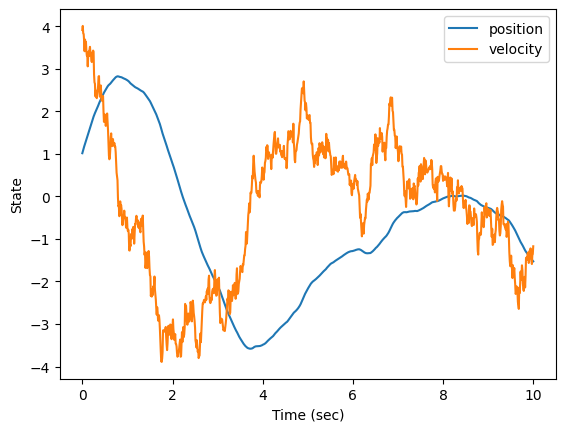

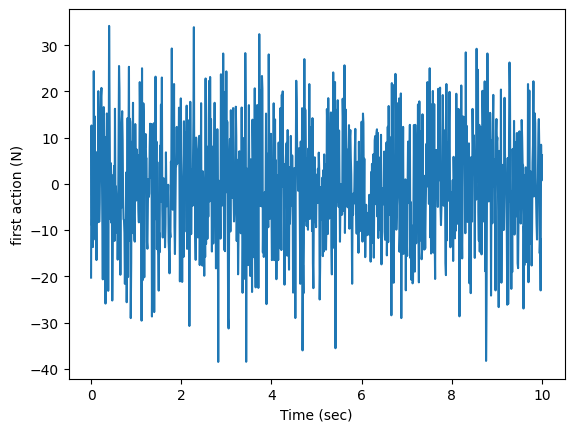

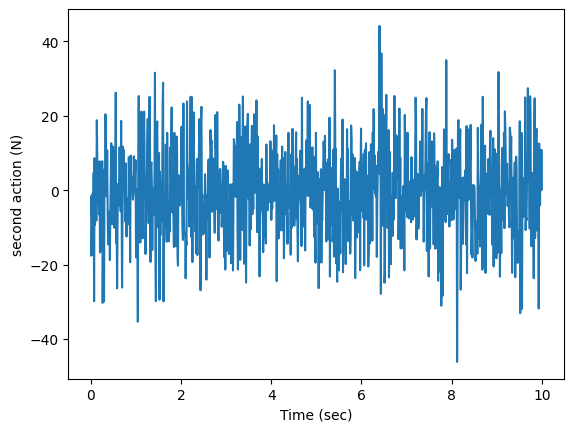

In [11]:
# test PPO agent (not trained)
ppo.test(deterministic=False)

In [14]:
ppo.second_player = True
ppo.train()

Streaming output truncated to the last 5000 lines.
|          LossPi_2 |           0.119 |
|           LossV_2 |            4.26 |
|     DeltaLossPi_2 |         0.00217 |
|      DeltaLossV_2 |        0.000612 |
|         Entropy_2 |            1.01 |
|              KL_2 |           0.423 |
|        ClipFrac_2 |           0.469 |
|          StopIter |               0 |
|              Time |             665 |
---------------------------------------
Early stopping at step 0 due to reaching max kl for 2th player.
---------------------------------------
|             Epoch |              96 |
|      AverageEpRet |           -16.6 |
|          StdEpRet |            8.52 |
|          MaxEpRet |           -8.13 |
|          MinEpRet |           -29.7 |
|             EpLen |           1e+03 |
|      AverageVVals |           -0.35 |
|          StdVVals |            1.64 |
|          MaxVVals |         -0.0572 |
|          MinVVals |             -24 |
| TotalEnvInteracts |        3.88e+05 |
|    

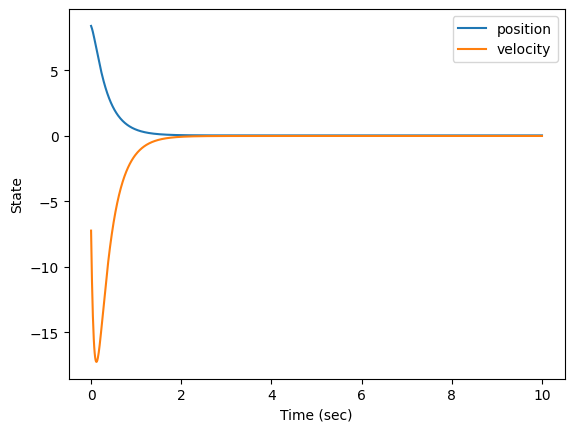

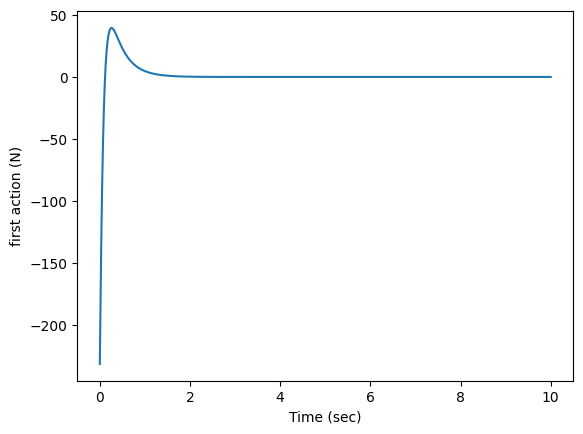

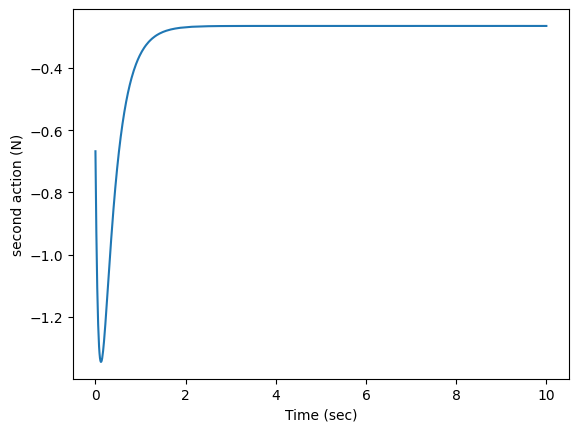

In [16]:
ppo.test()

In [17]:
try:
    import google.colab
    # download created models
    if os.path.isfile("results.tar.gz"):
        os.remove("results.tar.gz")
    !tar cvfz results.tar.gz model/ data/
    from google.colab import files
    files.download('results.tar.gz')
    print(colorize("Done! 🥰😎", 'blue', bold=True))
except:
    print(colorize("Something Wrong 🧐😩, or maybe you used your Mac 😱🥲", 'red', bold=True))

tar: model: Cannot stat: No such file or directory
data/
data/PPO_MBK_DG/
data/PPO_MBK_DG/PPO_MBK_DG_s0/
data/PPO_MBK_DG/PPO_MBK_DG_s0/progress.txt
data/PPO_MBK_DG/PPO_MBK_DG_s0/pyt_save/
data/PPO_MBK_DG/PPO_MBK_DG_s0/pyt_save/model.pt
data/PPO_MBK_DG/PPO_MBK_DG_s0/vars.pkl
data/PPO_MBK_DG/PPO_MBK_DG_s0/config.json
tar: Exiting with failure status due to previous errors


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Done! 🥰😎
